# Data: Past, Present, Future |  Lab 5  |  2/21/2018


# Principal Component Analysis & the pleasures (and hubris) (and poverty) of classification

<hr>
### DISCUSSION SUMMARY¶

#### PART 1: A BLISTERINGLY SHORT INTRO TO Principal Component Analysis (PCA)

    1. Pearson, Spearman, and Intelligence
    
    2. PCA & Dimensionality Reduction
    
    3. A) Attending to the flowers: PCA and the Iris data set
    
    3. B) Inventing IQs: PCA and Spearman data set
    
    4. Choose your own adventure...

#### PART 2: Imagining Communities using texts

    1. Using words as features
        - Words as Vectors in unique dimensions
    
    2. Imagining political communties / political discourse
    
    3. Try this at home: PCA on your own texts


In [1]:
# Some libraries and modules we'll need...

import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA 
import matplotlib.pyplot as plt
import matplotlib 
import text_analysis as ta 
import numpy as np

### Part 1: PCA and Intelligence Measuring

#### 1. Pearson, Spearman, and Intelligence 
- See Desrosieres, *The Politics of Large Numbers*, chap 4, 145-146.
- See also C. Spearman, "'General Intelligence,' Objectively Determined and Measured", *The American Journal of Psychology* 15, no 2 (Apr., 1904), 201-292.

Imagine that, like Spearman, you want to try to measure intelligence: and, again following Spearman's lead, you think that there's multiple kinds of intelligences one can have and produce a test to measure each of these kinds of intelligence. (There could be many reasons why you think there's 7 kinds of intelligence rather than 122 kinds or 2 kinds--but any reasons we *do* provide will depend on some conception of culture. More to the point, any definition of *intelligence* is always political.)

Let's say, for the sake of this example, that you believe there are 7 distinct kinds of intelligence. Thus, for each person, you have an array of 7 observations: $I_1, I_2, I_3,...I_7$. You'd like to understand (1) how the individual relates to a population and (2) how the entire sample population is distributed. If you think that each kind of intelligence is as important as every other kind of intelligence, you might give each $I_i$ its own dimension, giving you a 7-dimensional plot, which is very difficult to visualize or draw:

![7-features](7-features.jpeg)

Since it's difficult to visualize anything more than 3 dimensions, and it's usually much easier to visualize something in 2 dimensions, we'd like a way to squeeze this 7-dimensional data into 2-dimensions (or, in the case of Spearman, to squeeze the data into 1-dimension). How might we visualize this 7-dimensional data while retaining the distinctive patterns in the data? 

#### 2. PCA & Dimensionality Reduction
Let's say we have a lot of different kinds of observations for a particular kind of "object" (e.g., flowers, people, cars, GDPs, statistical entities...) and we want to compare them to *classify* and *then take action*.

<b>1. Writing down the data</b>

To continue our earlier example, to combine different "intelligences" of a particular person $p_i$, we write down each attribute with its corresponding dimension (which is easy to write mathematically though it is difficult to draw):

$p_i = I_1 + I_2 + I_3 + I_4 + I_5 + I_6 + I_7$

where each $I_i$ is a vector that is [orthogonal](https://en.wikipedia.org/wiki/Orthogonality) to every other $I_i$.

Our sample population is $\sum_{i = 1}^{n}p_i$

<b>2. Identify a new 2-dimensional subspace from the data</b>
Next, we determine a line that maxmizes the variance in the 7-dimensional data (i.e., we produce a line via the method of least squares), and label this line "principal component 1" or just "PC 1". We also produce a second line that is perpendicular to PC 1 and that also maximized the variance in the 7-dimensional data--we label this second line "principal component 2" or just "PC 2". 

Using PC 1 and PC 2, we define a new 2-dimensional subspace and plot all the data as *projections* into this new subspace. (Note: we're losing some data by doing this!)


<hr>

<b> For the more mathematically-inclined, we're doing the following:</b> 
1. Computing eigenvectors and eigenvalues from a covariance or correlation matrix
2. Sorting eigenvalue from greatest to lowest, and pick the the greatest corresponding eigenvectors for the number of K dimensions we want (in our case, just 2 dimensions)
3. Constructing a new subspace of 2 dimensions from the first two greatest eigenvectors we selected in step 2.
4. Projecting data into the new subspace we created in step 3.   

For a more detailed discussion of the math involved, see [here](https://plot.ly/ipython-notebooks/principal-component-analysis/#PCA-and-Dimensionality-Reduction)


#### 3a. Stop and observe the flowers: The famous Iris data set

First, where did this data set come from? How many features does it describe? How was the data collected and to what purpose?

For details about the contents of the data set, see https://archive.ics.uci.edu/ml/datasets/Iris/. 

For details about the historical origins of the data set, see here: https://en.wikipedia.org/wiki/Iris_flower_data_set. The dataset was popularized (but apparently not originally produced) in R. A. Fisher's "The use of multiple measurements in taxnomic problems," *Annual Eugenics* 7, Part II, 179-188 (1936); see also in *Contributions to Mathematical Statistics* (John Wiley, NY, 1950). 

In [2]:
## Quick way to ingest CSV data from ML data repository.
flowers = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

#rename column headings
flowers.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

#cleans NA entries 
flowers.dropna(how="all", inplace=True) # drops the empty line at file-end

#Let's inspect the dataset directly via panda's head()
flowers.head() #here we can see how the csv is structured

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# And here we can see that it's composed of 50-samples 
# of 3 kinds of flower, with 4 features per flower. Note
# that we have no missing values in the data set! Yay! 

flowers.groupby(by="class").count()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [4]:
## make table of iris data X 

# Note that .ix[] here is a "label-location based indexer" function
# for comparsion between .ix, .iloc, and .loc, see http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation
iris_X = flowers.ix[:,0:4].values #take all rows and the first 4 columns (in this case, the features)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [5]:
#...and class labels Y (as an array)
label_of_flower = flowers['class'].tolist()

In [6]:
# perform pca, pick number of dimensions...
iris_pca_model = sklearnPCA(n_components=2)
iris_pca_coordinates = iris_pca_model.fit_transform(iris_X)

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


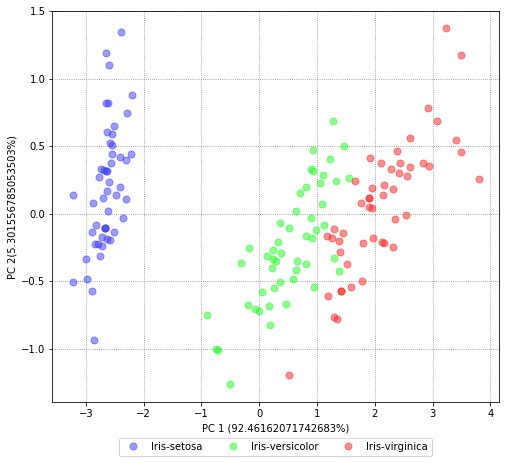

In [10]:
## PLOT IRIS DATA  ------
## RUN TWICE TO GET IT TO DISPLAY PROPERLY (this is a bug in matplotlib)

# GENERATE COLORS FOR PLOT ---
## randomly pick RBG colors for each "class"
number_of_flower_classes = 3 #change based on how many documents you have
colors = ta.generate_colors(3) #list of colors

# ASSIGN COLORS FOR EACH IRIS FLOWER --- 
colors_for_flowers = []
color_index = []
unique_label = list(set(label_of_flower))
for flower in label_of_flower:
    for kind in range(0, len(unique_label)):
        if flower == unique_label[kind]:
            color_index.append(kind)
            #print(colors[kind])
            colors_for_flowers.append(colors[kind])
            break

# PLOT PCA DATA --- 
## plot actual PCA data
label_seen = set()
for flower in range(0, len(iris_pca_coordinates)):
    plt.plot(iris_pca_coordinates[flower, 0], iris_pca_coordinates[flower, 1], 'o', markersize =7, alpha=0.5, color=colors_for_flowers[flower], label=label_of_flower[flower] if label_of_flower[flower] not in label_seen else None)
    label_seen.add(label_of_flower[flower])
##plot labels   
plt.xlabel('PC 1 ('+str(iris_pca_model.explained_variance_ratio_[0]*100)+'%)') #x-axis title
plt.ylabel('PC 2('+str(iris_pca_model.explained_variance_ratio_[1]*100)+'%)') #y-axis title
plot_size = 8 # change to change plot size
matplotlib.rcParams['figure.figsize'] = (plot_size, plot_size) #size of graph generated in notebook

##legend generation
plt.legend()  #generate legend explicitly
ax = plt.subplot(111) #used in making legend
plt.xlabel
plt.grid(b=True, which='major', color='gray', linestyle='dotted') # Add gridlines
## legend placement (outside of plot)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9]) ## Shrink current axis's height by 10% on the bottom
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.15), fancybox=True, shadow=False, ncol=5) # Put a legend below current axis
plt.show()

<b>What have we done here?</b> We've taken for features for each flower (sepal length & width, petal length & width), and found a way to project this 4-dimensional data into the 2-dimensional plot above. 

Note that nearly 92.5% of the variance is "described" (i.e., fitted) by PC 1, but only 5.3% of the variance is described by PC 2. That means the graph above describes about 97.8% of the variance in the data! If we have confidence in the data, we may be confident that we've retained meaningful struture of the data, despite the fact that we have "judiciously" thrown out data... 

###### 3a. Inventing Intelligence and  

Spearman argues that there is a
> relation of _any common and essential element in the Intelligences to any common and essential element in the Sensory Functions._ For brevity, we term these common elements "General Intelligence" and "General Discrimination[...]"[1]

He is arguing that "from several observed correlations we are able to deduce a single true one" and that "this latter alone is of real scientific significance".[2] Let's use principal component analysis to explore his data and consider his claimed correlations between "general discrimination" and "general intelligence." 

<small>[1] Spearman, "General Intelligence," Objectively Determined and Measured," _American Journal of Psychology_ 15, no. 2 (1904): 201-292.

[2] Spearman, 256.</small>

Let's begin by taking Spearman's data for school children as reported by Spearman (see page 286, "series I"), which we provide in the following file:

In [11]:
SpearmanObservations = pd.read_csv(
    filepath_or_buffer='./dat/spearman-286-seriesI.csv', 
    sep=',')

SpearmanObservations

,sex,age,pitch,light,weight,common sense A,common sense B,cleverness
0,f,11.500,8,4,4,6,5,2
1,m,12.916,15,3,4,11,7,22
2,f,12.666,14,6,4,16,10,7
3,f,13.666,13,4,9,1,1,1
4,m,11.333,5,14,7,3,2,3
5,f,11.916,25,7,4,10,14,9
6,f,11.250,10,19,8,8,19,12
7,f,13.083,10,12,10,2,4,6
8,m,12.416,18,11,9,5,6,11
9,m,12.583,14,30,7,21,22,19


Now we produce the same plot that we did above for the iris data:

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


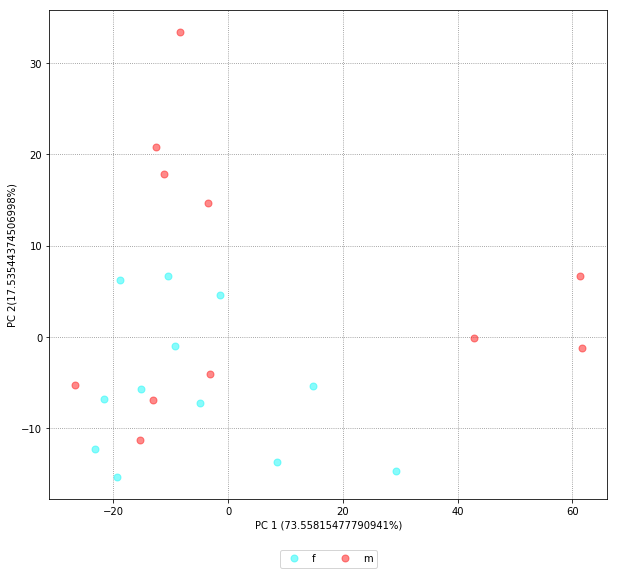

In [13]:
## MAKE LIST OF SPEARMAN DATA ------
# Note that .ix[] here is a "label-location based indexer" function
# for comparsion between .ix, .iloc, and .loc, see http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation
spearman_data_X = SpearmanObservations.ix[:,2:7].values #take all rows and the last 6 columns (i.e., we throw out sex and age)

#...and class labels Y (as an array)
spearman_labels = SpearmanObservations['sex'].tolist()

# perform pca, push 6 kinds of observations into 2 dimensions (i.e., a two-axis plot) 
pca_model = sklearnPCA(n_components=2)
pca_coordinates = pca_model.fit_transform(spearman_data_X)

## PLOT IRIS DATA -----
## RUN TWICE TO GET IT TO DISPLAY PROPERLY (this is a bug in matplotlib)

# GENERATE COLORS FOR PLOT ---
## randomly pick RBG colors for each "class"
number_of_classes = 2  # data set lists "male" and "female" 
colors = ta.generate_colors(2) # make list of colors

# ASSIGN COLORS FOR EACH SEX --- 
colors_for_sex = []
color_index = []
unique_label = list(set(spearman_labels))
for sex in spearman_labels:
    for kind in range(0, len(unique_label)):
        if sex == unique_label[kind]:
            color_index.append(kind)
            #print(colors[kind])
            colors_for_sex.append(colors[kind])
            break

# PLOT PCA DATA --- 
## plot actual PCA data
label_seen = set()
for person in range(0, len(pca_coordinates)):
    plt.plot(pca_coordinates[person, 0], pca_coordinates[person, 1], 'o', markersize =7, alpha=0.5, color=colors_for_sex[person], label=spearman_labels[person] if spearman_labels[person] not in label_seen else None)
    label_seen.add(spearman_labels[person])
##plot labels   
plt.xlabel('PC 1 ('+str(pca_model.explained_variance_ratio_[0]*100)+'%)') #x-axis title
plt.ylabel('PC 2('+str(pca_model.explained_variance_ratio_[1]*100)+'%)') #y-axis title
plot_size = 10
matplotlib.rcParams['figure.figsize'] = (plot_size, plot_size) #size of graph generated in notebook

##legend generation
plt.legend()  #generate legend explicitly
ax = plt.subplot(111) #used in making legend
plt.xlabel
plt.grid(b=True, which='major', color='gray', linestyle='dotted') # Add gridlines
## legend placement (outside of plot)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9]) ## Shrink current axis's height by 10% on the bottom
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.15), fancybox=True, shadow=False, ncol=5) # Put a legend below current axis
plt.show()

Some observations regarding our PCA graph and Spearman's data:
    1. Men and women do not appear to be very representative (men exist at extremes; women loosely cluster). Comentary about what was seen as "reasonable" in 1904.
    2. If we graph two independent axes, we find that the first principal describes 73.6% of variance. However the total variance being shown in the graph is only 91.094% That means there are still a number of other axes (not shown) that are describing the remaining 9% of the data. This is suggestive that Spearman's claims of one "general intelligence" is not very strongly supported by even his own data.    
    3. We haven't included age, but if you rerun the above analysis and include age, it doesn't change the results much. His data set spans roughly 3.8 years of difference in observed ages. 
    4. We haven't actually interrogated how Spearman's data was created. 
    5.

#### 4. Choose your own adventure...

Now that you've seen how to do PCA, it's time for you to try it out on a data set of your choosing. 

First, go the [machine learning repository](https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) and pick a data set you'd like to examine. 

Next, to download the data set directly into Pandas, INSERT THE ADDRESS FOR THE DATA SET YOU CHOOSE BELOW. (The address should end with ".data".) 

In [ ]:
## Quick way to ingest CSV data from ML data repository.
your_df = pd.read_csv(
    filepath_or_buffer='repository_address_that_ends_in_.data', #CHANGE 
    header=None, 
    sep=',')

After ingesting the data, take a look at how the data is organized...

In [ ]:
## Insert code to look at data using pandas 
# ...

Now rename your column labels to make it easier to manipulate...

In [ ]:
#rename column headings
your_df.columns=[INSERT_YOUR_NEW_COLUMN_LABELS_HERE--where_each_column_is_separated_by_commas]

Use the Iris example above to perform PCA on your data below. 


In [ ]:
#INSERT YOUR PCA CODE HERE...

### Part 2: Classifying texts 

#### 1. Using words as features
We can use PCA to examine collections of texts. To do this, we treat each word as a feature.

Thus for a corpus with just two texts of two words each, namely, $T_1 = (the, the)$ and $T_2 = (the, moose)$, we would draw:

![Words](Words.jpeg)

For each additional text $T_i$, we'd add a new data point in the plot above. For each additional *word* in the corpus, we'd add a new dimension to the plot above. If our corpus has a million words, our plot above would have a million dimensions. As above, we'll use PCA to reduce our million-dimension data set into a 2-dimension data set that we can easily visualize. 

#### 2. 9 novels example

Now to "preprocess" these 9 novels (to tokenize, count up words, calculate word frequencies) takes <b>about 15 minutes to calculate on our shared server.</b> 

By changing the <b>data_location</b> parameter in the code block below, you can use this example on your own texts.

In [ ]:
## PCA Data Parameters --------------------------
data_location = "./dat/9_novels/" 
chunk_corpus_flag = 0     # 0 = don't chunk texts; 1 = do chunk texts
number_of_MFWs_used = 0 #number of MFWs used to plot PCA graphs # if set to 0, will use all words

In [ ]:
## Prepare, Tokenize, and Count Words of Corpus -----------------------

## THIS TAKES OVER AN HOUR TO RUN ON THE 9 NOVELS CORPUS
## YOU CAN UPLOAD THE CALCULATION RESULTS DIRECTLY INTO MEMORY
## BY EXECUTING THE "Load 9 novel dataset" CODE BLOCK BELOW
## IF YOU SAVED THE RESULTS PREVIOUSLY 

## read & tokenize all txts in data_location directory; translate txt files into list of (ordered) 1-word strings
wordlist, textnames = ta.tokenized_texts_and_textname_list(ta.filenames_of_txts_in_directory(data_location), data_location)

## generate word counts
### word_counts: dict of individual word counts per text
### total_word_counts: list of total word counts per text
word_counts, total_word_counts = ta.type_counts_and_total_token_counts(wordlist)

## corpus_word_count_for_chunks: total word count of corpus (same as corpus_word_count_for_chunks)
corpus_word_count = ta.total_number_of_words_in_corpus(total_word_counts)

## generate word frequencies 
word_frequencies = ta.word_freq(word_counts, corpus_word_count)

We can save the output (i.e., wordlist, textnames, word_counts, word_frequencies, etc.) from the code block above using the code block below. If you're using your own texts, be sure to change the corpus_folder variable. 

In [ ]:
## SAVE THE RESULTS FROM THE "Prepare, Tokenize, and Count Words of Corpus" code block
## Once you calulate the above code block, you can save the data by uncommenting and executing the code below. 

#corpus_folder = "9_novels"
#ta.export_PCA_analysis(corpus_folder, word_counts, total_word_counts, corpus_word_count, word_frequencies, wordlist, textnames)

If you've saved the calculation results by executing the code block above, you can load the results into memory with the code block below.

In [ ]:
### If you have previously saved the 9_novel results with the code block above, you can reload this data 
### by executing this code block

#wordcounts, total_word_counts, corpus_word_count, word_frequencies, wordlist, textnames = ta.import_PCA_analysis('51_novels')
#chunk_corpus_flag = 0  
#number_of_MFWs_used = 0

In [ ]:
## Inspect most frequent words (MFWs) ------------------
text_index_to_compare_MFWs = 0 # column identifer for a particular text; full list in "textnames"
MFW = ta.obtain_MFW(word_frequencies, text_index_to_compare_MFWs, textnames)


# Columns are individual texts (i.e., novels in this case), rows are words
MFW.head(25) #list first 25 words for all texts

In [ ]:
## Perform PCA on Word Frequencies
 
if chunk_corpus_flag == 0: 
    ## Perform PCA on Word Frequencies
    text_index_to_compare_MFWs = 0 # column identifer for a particular text; full list in "textnames"
    number_of_components = 2 # how many dimensions for PCA
    pca_coordinates, pca_results = ta.PCAnalysis(word_frequencies, number_of_MFWs_used, corpus_word_count, number_of_components, text_index_to_compare_MFWs)

In [ ]:
## May need to run this code block twice to get it to display properly

if chunk_corpus_flag == 0: 

## generate color spectrum based on word count of texts ----------
    total_word_counts_nparray = np.array(total_word_counts) # convert word count list into a numpy array
    colors_for_texts = ta.assign_text_colors_via_word_counts(total_word_counts_nparray, total_word_counts)

##plot PCA without legend or tables -------
    size_of_plot = 20
    name_of_file = "pca-"+ str(number_of_MFWs_used) +"-Full-wc_color_coded"
    ta.plot_PCA(pca_coordinates, pca_results, colors_for_texts, textnames, size_of_plot, 0, name_of_file)  # last three inputs are plot_size, output flag, graph name

#### For reference, also generate historgram
    ta.histogram_of_word_counts(total_word_counts_nparray, 0, "histo-"+str(number_of_MFWs_used)+"-Full")

<b>Observations</b>: In the above PCA diagram, we produced a PCA plot of 9 novels in which the texts are color-coded according to their word count such that the darker the shade of color, the smaller the total word count of the text. As is immediately obvious from this PCA graph, the texts do indeed strongly cluster by word count length. There IS a correlation between the size of the novel and how it clusters!

The historgram gives us a better sense of the distribution of different sizes of novels in this corpus. 

Note in the above PCA plot that PC 1 "describes" 84.9% of the variance and that PC 2 "describes" 7.7% of the variance, leaving loosely 7.6% of the variance of the data unaccounted for. Thus, while giving up some of the data via dimensionality reduction, we still have a fairly useful representation of the data. Note that much of the "difference" between novels can be visually apprehended along PC 2, despite the fact that PC 2 accounts for just 7.7% of the total variance.    

To get a better sense of the relationships between novels of different authors, let's look at this plot using labels.  

In [ ]:
if chunk_corpus_flag == 0: 
    ## generate color spectrum based on word count of texts ---------
    total_word_counts_nparray = np.array(total_word_counts) # convert word count list into a numpy array
    colors_for_texts = ta.assign_text_colors_via_word_counts(total_word_counts_nparray, total_word_counts)

    ## plot PCA data with labels and arrows
    size_of_plot = 30
    name_of_file = "pca-"+ str(number_of_MFWs_used) +"-Full-labels"
    output_file = 1 # for PDF, output_flag = 1; for PNG, output_flag = 2; else output_flag = 0
    ta.plot_PCA_with_labels(pca_coordinates, pca_results, textnames, colors_for_texts, size_of_plot, output_file, name_of_file) # last two inputs are plot_size and output flag 


Note that while Stevenson's and James' novels tend to cluster a bit, Dickens' novels tend to be more separated from each other in this representation. How much of this is due to the difference in length of the novels? 

We'd like to understand how these novels are related by content rather than by page length. One way to do this is by breaking up the novels into equally-sized "chunks" and comparing these "chunks".  

#### 3. Classifying Language and Imagining Relationships (text chunking): 4 novels example

In [ ]:
## PCA Data Parameters --------------------------
data_location = "./dat/four_novels/" 
chunk_corpus_flag = 1     # 0 = don't chunk texts; 1 = do chunk texts
number_of_MFWs_used = 0  #number of MFWs used to plot PCA graphs; 0 = use all words

## Chunking Parameters ----------------------
chunk_size_used = 5000    # number of words per chunk (but will give >chunk_size final word chunks)

In [ ]:
## Prepare, Tokenize, and Count Words of Corpus -----------------------

if (chunk_corpus_flag == 1): 
    ## read & tokenize all txts in data_location directory; translate txt files into list of (ordered) 1-word strings
    wordlist, textnames = ta.tokenized_texts_and_textname_list(ta.filenames_of_txts_in_directory(data_location), data_location)
    
    ## CHUNK TEXTS
    ## chunk_wordlist = same as wordlist, but each element is now a "text chunk" instead of a "text"
    ## chunk_index = provides start and end elements for each text in chunk_wordlist
    chunk_wordlist, chunk_index = ta.chunk_all_texts(wordlist, textnames, chunk_size_used)
    
    ## GET WORD COUNTS FOR ALL CHUNKS; 
    ## WHERE chunk_word_counts IS A LIST OF INDIVIDUAL WORD COUNTS PER CHUNK
    ## AND chunk_total_word_counts IS A LIST of TOTAL WORD COUNTS PER CHUNK
    chunk_word_counts, chunk_total_word_counts = ta.type_counts_and_total_token_counts(chunk_wordlist)
    corpus_word_count_for_chunks = ta.total_number_of_words_in_corpus(chunk_total_word_counts)
    
    ## CALCULATE CHUNK WORD FREQUENCIES (RELATIVE TO ENTIRE CORPUS)
    chunk_word_frequencies = ta.word_freq(chunk_word_counts, corpus_word_count_for_chunks)
    
    print("corpus word count: " + str(corpus_word_count_for_chunks))

In [ ]:
## uncomment line below to save results for chunked texts

#ta.export_chunked_text_analysis('four_novels', chunk_word_counts, chunk_total_word_counts, corpus_word_count_for_chunks, chunk_word_frequencies, chunk_wordlist, chunk_index, wordlist, textnames)


In [ ]:
## to import saved chunked text data, uncomment the lines below and execute

#chunk_corpus_flag = 1
#number_of_texts = 4  #change to correct value if necessary
#chunk_size_used = 5000  #change to correct value if necessary 
#chunk_word_counts, chunk_total_word_counts, corpus_word_count_for_chunks, chunk_word_frequencies, chunk_wordlist, chunk_index, wordlist, textnames = ta.import_chunked_text_analysis("four_novels")

In [ ]:
## PERFORM PCA ON CHUNKED TEXTS

if (chunk_corpus_flag == 1): 
    number_of_PCs = 2
    text_index_compare_MFWs = 0 
    number_of_MFWs_used = 0  #PCAnalysis will use full corpus of words when examining chunks 
    pca_coordinates_for_chunks, pca_results_for_chunks = ta.PCAnalysis(chunk_word_frequencies, number_of_MFWs_used, corpus_word_count_for_chunks, number_of_PCs, text_index_compare_MFWs)

In [ ]:
## color scheme for chunk graph
## this code will randomly select colors for each "text"
number_of_texts = 4 #change based on how many documents you have
colors_for_texts = ta.generate_colors(number_of_texts)
colors_for_texts

In [ ]:
# DISPLAY PCA RESULTS! / may need to run code twice to get graph to display properly

output_flag = 1
plot_name = 0 #reverts to default name; to supply alternate name, provide a string here 
plot_size = 10.0
ta.plot_PCA_chunked_with_legend(pca_coordinates_for_chunks, pca_results_for_chunks, chunk_index, chunk_size_used, colors_for_texts, textnames, plot_size, output_flag, plot_name)

A few things to note about the graph above:

0. The function plot_PCA_chunks_with_legend automatically generates a PDF of the above graph (found in the home directory of the repo). <b>It is easier to examine the graph above via the PDF file than directly in this notebook</b>. 

1. Note that principal component 1 (i.e., "PC 1") accounts for 27.1% of the variance of the data, while PC 2 accounts for 15.1% of the data. That still leaves about 57.8% of the variance of the data *unaccounted* for! <b>So while this graph describes the text-as-data, it certainly does not "capture" all the variance! </b>(It doesn't even describe half of the variance.) For this reason, we may choose to examine other PCs besides the first and second principal component. *See below.* 

2. Note that certain sections of Charlotte Bronte's *Jane Eyre* (1847), *Shirley* (1849), and *Villette* (1853) very nearly overlap, suggesting similarity of word usage. *The Professor* (1857) was the first novel that Bronte wrote; however, it entirely rejected by publishers initially, and only recieved publication posthumously.  While *Villette* was published before *The Professors*, according to the "Preface" in *The Professor*, *Villette* "made some use of the materials" of in Bronte's first novel. That said, the graph <b>above</b> suggests there is actually a greater similarity word-usage overlap between *Villette* and *Jane Eyre* than between *Villette* and *The Professor*. Such a graph, for those interested in literary studies, can serve as an interpretative prod and provocation for further literary analysis.

3. Certain sections of novels are very similar to each other in word-usage--sometimes these "similar" sections are from different novels, other times they are from the same novel. As historians and literary scholars, we may want to compare what is being discussed in these similar sections. We do this now--

#### Examining and Comparing Individual Text Chunks

First, lets figure which chunks are which by identifying their "chunk index" number. We can do this graphically as follows by replotting the above graph with labels:

In [ ]:
## Note that we use the same colors as above,
## so the colors denote the same texts as above

output_flag = 1
plot_name = 0 #reverts to default name; to supply alternate name, provide a string here 
plot_size = 30.0
ta.plot_PCA_chunked_with_labels(pca_coordinates_for_chunks, pca_results_for_chunks, chunk_index, chunk_size_used, colors_for_texts, textnames, plot_size, output_flag, plot_name)

So chunk 2 is in "Cbronte_Professor_1857", chunk 81 is in "Cbronte_Jane_1847", and chunk 135 is in "Cbronte_Villette_1853". 

You can view the specific text chunks in the "chunk_wordlist". The order of the words is the order of the text. For instance here's the first 10 words of the first chunk of the first text in "textnames":

In [ ]:
chunk_wordlist[0][:10]

In [ ]:
## To reassemble and output chunk 2 to read
## Warning: THIS WILL BE 5,000 words
## to get output, uncomment print command below

chunk_text = ""
for word in chunk_wordlist[2]:
    chunk_text = chunk_text +" "+ word
# print(chunk_text)

#### 4. Now it's your turn! Find some texts you'd like to perform PCA on. 
1. Each text should be a separate txt file, each of which should be placed in a single folder in the dat directory. (To do this, download a folder of texts using the "!wget" command, and then use "!mvdir ./[name_of_folder] ./dat/[name_of_folder]".) Don't do too big of a data set
2. Copy and paste the code from above, but be sure to change the "folder location" in the above commands.
3. What interesting observations can you infer about the texts?

In [ ]:
# WRITE YOUR OWN PCA CODE FOR YOUR OWN TEXTS
# ....

<b>Alternatively<b>, you can use a corpus of US president inaugural addresses included with the NLTK package. You can get the lists "textnames" and "wordlist" below, and then use code from above...

In [ ]:
from nltk.corpus import inaugural

#print(inaugural.fileids()) #this gives a list of all the file names

# TO GET TEXTNAMES ---
textnames = [fileid for fileid in inaugural.fileids()] # THIS IS A FANCY WAY OF WRITING A FOR LOOP CALLED A "LIST COMPREHENSION"
#print(textnames)

In [ ]:
## TO GET WORDLIST, i.e., to get the words for each text file)

#TEST OUTPUTS
#print(inaugural.words([textnames[0]])) #outputs list of words of first speech
#print(len(inaugural.words([textnames[0]]))) #outputs number of words in the first speech
#inaugural.words('1789-Washington.txt')[10:] #outputs first ten words of first speech

#TO GET WORDLIST ---
wordlist = [inaugural.words(textnames[file]) for file in range(0, len(textnames))] #This is another "list comprehension"
#print(wordlist)